In [1]:
# preliminaries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Expected Values using Methods 1 and 2

Suppose we want to compute the expected value of a function $f(x)$ given the PDF $\pi(x)$ of $x$.

$$E[f]  = \int_{a}^{b} f(x) \pi(x) \, dx.$$

If we define $g(x) = f(x) \pi(x)$, we can use our standard method for computing $E[f]$. Let us call this Method 1.

## Method 1

* draw $n$ samples $x_1, x_2, ..., x_n$  from $u(x) = U[a, b)$

* estimate $\bar{g}$ by averaging,
\begin{equation}
\bar{g} \approx \dfrac{1}{n} \sum_{j=1}^{n} g(x_j) = \dfrac{1}{n} \sum_{j=1}^{n} \pi(x_j) f(x_j) 
\end{equation}
* hence, estimate $E[f] = \bar{g} (b-a)$:
\begin{equation}
E[f] = \dfrac{b-a}{n} \sum_{j=1}^{n} \pi(x_j) f(x_j)
\end{equation}

## Method 2

This is useful, when it is convenient to sample $x \sim \pi(x)$:

* draw $n$ samples $x_1, x_2, ..., x_n$ from $\pi(x)$
* estimate $E[f]$ directly by a simple average:
\begin{equation}
E[f] \approx \dfrac{1}{n} \sum_{j=1}^{n} f(x_j)
\end{equation}

**Example**

Evaluate the expected value,
\begin{equation}
E[f]  = \int_{-10}^{10} f(x) \pi(x) dx = \int_{-10}^{10} g(x) dx
\end{equation}
with $f(x) = x^2$, and $\pi(x) = \mathcal{N}(0,1)$, the unit normal distribution,
$$\pi(x) = \dfrac{1}{\sqrt{2 \pi}} \exp (-\dfrac{x^2}{2}).$$

In [2]:
f = lambda x: x**2	# f(x)
p = lambda x: 1./np.sqrt(2.*np.pi) * np.exp(-x**2/2.) # target distribution
g = lambda x: f(x) * p(x)  # combination g(x)

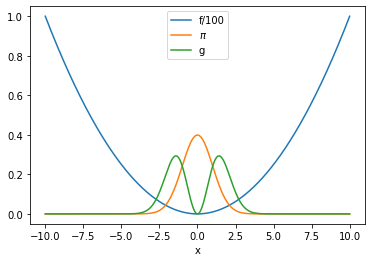

In [3]:
x = np.linspace(-10, 10, 500)
plt.plot(x, f(x)/100, label='f/100')
plt.plot(x, p(x), label=r'$\pi$')
plt.plot(x, g(x), label='g')

plt.xlabel('x')
plt.legend()


In [4]:
# E[f] numerical integral using built-in integrator
from scipy.integrate import quad
quad(g, -10, 10)

(1.0, 7.348033275594856e-10)

In [5]:
# Method 1
x     = np.random.uniform(-10, 10, size=10000)	# uniform distribution
gbar1 = np.mean(g(x))	# average
fbar1 = gbar1 * (10. - (-10.))  # E[f] for method 1
fbar1

0.9840460728832774

In [6]:
# Method 2
x = np.random.normal(0, 1, size=10000) # target distribution
fbar2 = np.mean(f(x)) # simple average E[f] for method 2
fbar2

0.9964051491805962

# Importance Sampling Example

Find the integral,
$$I = \int_0^2 3x^2 dx.$$
by (importance) sampling from $\pi(x) = x/2$.


First, we can use the transformation rule to sample from $\pi(x) = x/2$.

If $u \sim U[0,1]$, then $$u = F(x) = x^2/4 \implies x = \sqrt{4u}$$

In [7]:
def drawLinearDist(npts):
    u = np.random.rand(npts)
    return np.sqrt(4.0*u)

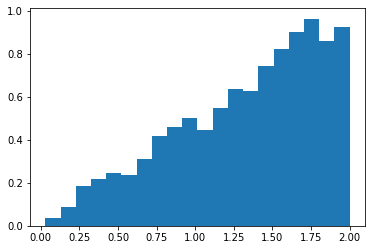

In [8]:
x = drawLinearDist(5000)
_ = plt.hist(x, 20, density=True)

In [9]:
def uniformSampling(npts):
    """draw points uniformly distributed"""
    b  = 2.
    a  = 0.
    x  = np.random.uniform(a, b, npts)
    f  = 3.*x**2
    
    intg = (b-a) * np.mean(f)
    stdI = (b-a) * np.std(f)/np.sqrt(npts)
    
    return intg, stdI
  
def importanceSampling(npts):
  """draw points from linear distribution"""
    x  = drawLinearDist(npts)
    f  = 3.*x**2
    p  = x/2.0   #pi(x)
    intg = np.mean(f/p)
    stdI = np.std((f/p))/np.sqrt(npts) # error

    return intg, stdI

In [10]:
uniformSampling(50)

(6.477025989304921, 0.9566117947462529)

In [11]:
importanceSampling(50)

(8.004968084634442, 0.36617922067313685)

## Poor Choice of $\pi(x)$

Let us choose $\pi(x) = 1 - x/2$.

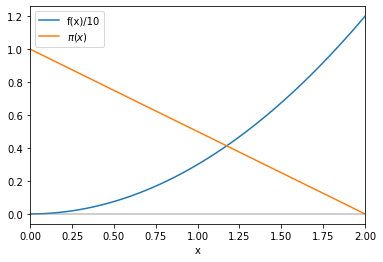

In [12]:
xi = np.linspace(0,2)
plt.plot(xi, 3*xi**2/10, label='f(x)/10')
plt.plot(xi, 1.-xi/2., label=r'$\pi(x)$')
plt.axhline(y=0, c='gray', alpha=0.5)
plt.xlim(0,2)
plt.legend()
plt.xlabel('x');

Using Sympy to get the transformation rule.

The solution (to the quadratic equation) is,

$$x = \pm 2 \sqrt{- u + 1} + 2$$

Only one of them is meaningful because it has the correct range $[0,2]$.

$$x = 2(1 - \sqrt{1-u})$$

In [ ]:
import sympy as sp
x, u = sp.symbols('x, u')

In [ ]:
# Find CDF
f = 1 - x/2
F = sp.integrate(f, (x,0,x))
print(F)

-x**2/4 + x


In [ ]:
expr = u - F
sp.solve(expr, x)

⎡      ________          ________    ⎤
⎣- 2⋅╲╱ -u + 1  + 2, 2⋅╲╱ -u + 1  + 2⎦

In [ ]:
def drawPoorLinearDist(npts):
    u = np.random.rand(npts)
    return 2*(1-np.sqrt(1.-u))

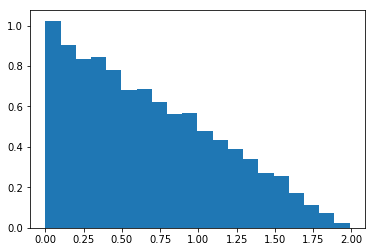

In [ ]:
x = drawPoorLinearDist(10000)
_ = plt.hist(x, 20, density=True)

In [ ]:
def importanceSamplingPoor(npts):
  """draw points from linear distribution"""
  x  = drawPoorLinearDist(npts)    
  f  = 3.*x**2
  p  = 1. - x/2.0   #pi(x)

  intg = np.mean(f/p)
  stdI = np.std((f/p))/np.sqrt(npts) # error

  return intg, stdI

In [ ]:
importanceSampling(100000)

(8.006123329237878, 0.008962660385941465)

In [ ]:
importanceSamplingPoor(100000)

(8.111033858890991, 0.11071533233500305)

Let us vary the number of darts

In [ ]:
ndarts = np.logspace(2, 5, 25, dtype=int)

In [ ]:
N  = len(ndarts)
Ig = np.zeros(N); sIg = np.zeros(N);
Ip = np.zeros(N); sIp = np.zeros(N);
Iu = np.zeros(N); sIu = np.zeros(N);

for i, n in enumerate(ndarts):
  Ig[i], sIg[i] = importanceSampling(n)
  Ip[i], sIp[i] = importanceSamplingPoor(n)
  Iu[i], sIu[i] = uniformSampling(n)

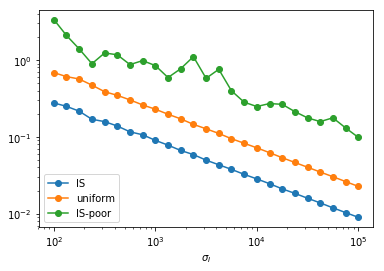

In [ ]:
plt.plot(ndarts, sIg, 'o-', label='IS')
plt.plot(ndarts, sIu, 'o-', label='uniform')
plt.plot(ndarts, sIp, 'o-', label='IS-poor')

plt.xlabel('n')
plt.xlabel(r'$\sigma_I$')


plt.xscale('log')
plt.yscale('log')

plt.legend(loc='lower left')